<a href="https://colab.research.google.com/github/MagixIsAvailable/NLP_labs/blob/main/Copy_of_Lab01_Introduction_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Please create your own copy of this lab

Use `File -> Save a copy in Drive` to save a copy of this file to your local area. Repeat this step for future Colab lab files so that you can execute the codes in the cells.

`File -> Locate in Drive` shows you were the file is stored in your Google Drive. You may want to sort your Colab files in folders for easier access.


# Week 1 - Classifiers on Tabular Data

##Lab Exercises

---



To follow up our introduction, let's start by exploring the SKLearn library to compare a series of classifiers on a tabular diabetes dataset.

<br>

---

#Task 1: Implementing the kNN Algorithm

<br>

The first task for this week is to implement the kNN algorithm using SKLearn. SKLearn is a multi-functional python library designed to support all aspects of data science (available: https://scikit-learn.org/stable/). The next few sub-tasks will talk you through the process of building an implementation using the SKLearn framework.

<br>

##Task 1.1: Loading a Dataset

The first step will be to load a dataset. Try downloading the diabetes_data_upload.csv file from the link on CampusMoodle, or the following URL: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

To load the dataset, try the following code. Please note that when you run the code, you will be prompted to select a file from your computer to upload, so make sure that you have fully downloaded the iris dataset before starting.

In [44]:
import pandas as pd #we will use pandas to view data in dataframes
import io #io we use to load the data after uploading (as colab uses dictionaries to store uploaded files)
from google.colab import files #finally, we import the files package from google.colab framework to be able to upload files

import random #we will be doing anumber of things that are 'random' so we set the seed for reproducibility
random.seed(1337)

uploaded = files.upload() #we then call the upload() function to give us the opportunity to load a file into our script

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [49]:
diabetes_file = io.BytesIO(uploaded['diabetes_data_upload.csv']) #the file is uploaded as a value in a dictionary, with the filename as the key
diabetes_df = pd.read_csv(diabetes_file) #after getting the file to a format we can work with, we use pandas to read the data as a dataframe
print(diabetes_df) #calling print allows us to view the dataframe

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

In [50]:
print(uploaded.keys())

dict_keys(['diabetes_data_upload.csv'])


The dataframe tells us some useful information about the dataset we have just downloaded. For example, we can see that there are 17 columns (16 features and 1 label) and 520 rows. The features are generally categorical, and describe aspects of the patients medical history with a simple binary system (i.e. whether a symptom is/has been present).

Storing data in dataframes is really useful, as dataframes have some inbuilt functionality to help you deal with missing values, or indeed changing values to a new representation. For this exercise we will convert the dataframe to an array to make things clear.

In [51]:
prep_diabetes_df = diabetes_df.replace(["No"], 0)
prep_diabetes_df = prep_diabetes_df.replace(["Yes"], 1)

prep_diabetes_df = prep_diabetes_df.replace(["Male"], 0)
prep_diabetes_df = prep_diabetes_df.replace(["Female"], 1)

print(prep_diabetes_df)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1           1                   1         1   
518   32       1         0           0                   0         1   
519   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

/tmp/ipython-input-2260305224.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prep_diabetes_df = prep_diabetes_df.replace(["Yes"], 1)
/tmp/ipython-input-2260305224.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prep_diabetes_df = prep_diabetes_df.replace(["Female"], 1)


In [52]:
import numpy as np #import numpy to enable array functionality
np.random.seed(1337) #random seed

df_keys = diabetes_df.columns.tolist()
df_keys.remove("class")
print(df_keys)


x = prep_diabetes_df[df_keys].to_numpy() #next we convert the feature columns into a numpy array
y = prep_diabetes_df[['class']].to_numpy().ravel() #swiftly followed by the label column - and our dataset is now ready
#print(x) #feel free to uncomment and check the output
#print(y)

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']


## Task 1.2 - Implementing kNN in sci-kit learn

Now that we have our datset, we can implement a kNN using sci-kit learn library: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [53]:
from sklearn.neighbors import KNeighborsClassifier #import the relevant tools from the library

model = KNeighborsClassifier(n_neighbors = 1) #then we instantiate a k nearest neighbour model, with a k value of 1 using the n_neighbours parameter
model.fit(x,y) #we then fit our data and labels to the model (remember, there is no 'training' for kNN)


KNeighborsClassifier(n_neighbors=1)

So we can make predictions with our model - great! Only one problem - how do we know if the prediction is accurate? In the previous example, we didn't leave any data to test it with!

To decide that, we need to use an evaluation methodology. An evaluation methodology will ensure that the model can be evaluated with scientific rigour, giving us the capability to describe how well our model performs.

In this lab, we will use the **cross-fold validation** evaluation mehodology. Cross-fold validation effectively divides your dataset into non-overlapping train and test sets. These train and test sets are completely separate from one another, allowing the train set to be used for model learning and the test set for model evaluation.

The next question may then be, well how do we know our model did not just get really lucky and pick an easy test set? We don't know the answer to that - if we only perform the evaluation once. In cross-fold evaluation, the the process of splitting into train and test is repeated a set number of times (i.e. the number of 'folds'). This ensures that the testing is rigourous - let's try it out!

In [54]:
from sklearn.model_selection import StratifiedKFold #cross fold is sometimes called k-fold. Calling the stratified version ensures that classes have equal representation across folds
from sklearn.metrics import accuracy_score #import an accuracy metric to tell us how well the model is doing

acc_score = [] #create a list to store the accuracy values
model2 = KNeighborsClassifier(n_neighbors=1) #instantiate the model

kf = StratifiedKFold(n_splits=5) #we instantiate the kfold instance, and set the number of folds to 5
for train, test in kf.split(x,y): #we use a for loop to iterate through each fold using the train and test indexes from the dataset

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test] #things can get a bit weird when inputting indexes to functions, so lets save them as variables
  #print(train)
  #print(test) #this will print the train and test indexes respectively, if you want to be sure they do not overlap

  model2.fit(x_train, y_train) #we then only fit the training data
  predictions = model2.predict(x_test) #and can predict on the test data
  acc = accuracy_score(predictions, y_test) #we use the accuracy score we imported to give an idea how well the model is doing
  acc_score.append(acc) #we can append it to our list

print(acc_score) #wowza, looks ike it's pretty good!


[0.9038461538461539, 0.9134615384615384, 0.9134615384615384, 0.9711538461538461, 0.9711538461538461]


Now that we have run the classifier multiple times on distinct test sets, we can visualise the performance as a boxplot. This will indicate to us the mean (which we already know), the standard deviation of the data, and any outliers.

We will create our boxplot using the Matplotlib library - which is generally considered the standard.

[Text(1, 0, 'knn')]

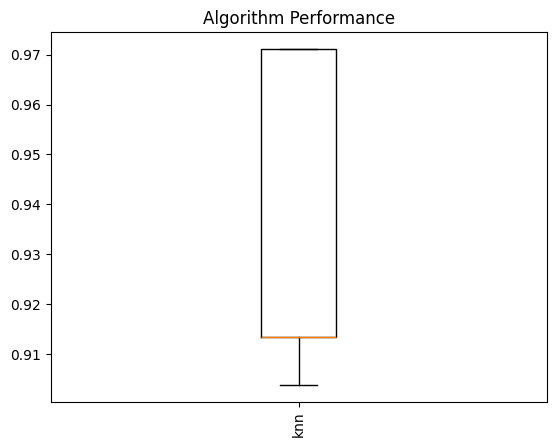

In [55]:
import matplotlib.pyplot as plt #import matplotlib

fig1, ax1 = plt.subplots()
ax1.set_title("Algorithm Performance")
ax1.boxplot(acc_score)


ax1.set_xticklabels(["knn"], rotation='vertical')

So here our mean is about 92%. This is a pretty good classifier all in all. After all, achieving 92% accuracy on average means that we are getting approx 92/100 diagnoses correct.

However, is there any way we can improve on that number?

<br>

## Task 1.3 - Finding the Best Parameters

If we have a model in mind, we may wish to refine that model and check we are using the best set of parameters. We can automate this using a Gridsearch - a brute force check of a conigurable set of parameters. It will effectively perform a cross-fold validation for each combination of parameters, storing the results and allowing us to identify the best set of parameters.

As it is a brute force check, this can take some time.

In [56]:
from sklearn.model_selection import GridSearchCV #import gridsearch

knn = KNeighborsClassifier() #create the knn classifier
#print(knn.get_params().keys()) #use this to check the parameters you can adjust (or look at the documentation)

parameters = {"n_neighbors":[1,3,5], "metric":["euclidean", "cosine"], "weights":["distance", "uniform"]} #we then create a dictionary storing the combination of params we wish to optimise
clf = GridSearchCV(knn, parameters) #and instantiate a grid search object
clf.fit(x, y) #we can then fit our data

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine'],
                         'n_neighbors': [1, 3, 5],
                         'weights': ['distance', 'uniform']})

In [57]:
print(clf.best_params_) #to check the best parameters
print(clf.best_score_) #to check the best score (in this case accuracy)

#print(clf.cv_results_.keys()) #to check the various possible outputs
#print(clf.cv_results_["params"]) #to print the sets of parameters tested
#print(clf.cv_results_["mean_test_score"]) #to print the mean of each set of outputs of the tested parameters combinations

{'metric': 'cosine', 'n_neighbors': 1, 'weights': 'distance'}
0.9634615384615384


So through a simple parametrisation of our kNN classifier, we can improve our accuracy to 96% - which is very good!



## Task 1.4 - Comparing Multiple Classifiers

What if we didn't already have a classifier in mind? We potentially would like to check a number of classifiers.

Honestly, this is a less likely scenario than already having a suspicion that a certain algorithm will work well on our data (i.e. if it were image-based, we would likely already be considering Convolutional Neural Networks for example). However, it can be useful to baseline multiple types of algorithm. This might be revealing - for example, it could indicate that similarity-based algorithms will perform better than regressive algorithms.

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #first let's import a few classifiers from SKLearn to try out

names = [
    "k Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
    "Artificial Neural Net"
] #create a list of their names

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000) # Increased max_iter
] #and a list of classifier objects. We have not paid too much attention to their parametisation, so feel free to experiment.

classifier_dict = {}
for i in range(len(names)):
  classifier_dict[names[i]] = {"Classifier":classifiers[i]} #let's then create a dictionary to store each combination of algorithm name and object

print(classifier_dict)

{'k Nearest Neighbors': {'Classifier': KNeighborsClassifier(n_neighbors=3)}, 'Linear SVM': {'Classifier': SVC(C=0.025, kernel='linear')}, 'Decision Tree': {'Classifier': DecisionTreeClassifier(max_depth=5)}, 'Random Forest': {'Classifier': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)}, 'Artificial Neural Net': {'Classifier': MLPClassifier(alpha=1, max_iter=1000)}}


In [61]:
for key in classifier_dict.keys(): #we can the iterate through each item in our dictionary and run the same CV as above
  acc_score = [] #create a list to store the accuracy values

  model = classifier_dict[key]['Classifier']

  kf = StratifiedKFold(n_splits=5) #we instantiate the kfold instance, and set the number of folds to 5
  for train, test in kf.split(x,y): #we use a for loop to iterate through each fold using the train and test indexes from the dataset

    x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test] #things can get a bit weird when inputting indexes to functions, so lets save them as variables

    model.fit(x_train, y_train) #we then only fit the training data
    predictions = model.predict(x_test) #and can predict on the test data
    acc = accuracy_score(predictions, y_test) #we use the accuracy score we imported to give an idea how well the model is doing
    acc_score.append(acc) #we can append it to our list

  classifier_dict[key]["CV Fold Scores"] = acc_score #this time, instead of printing we will add our cv scores back to our dictionary so they are associated with each algorithm

Note that you will probably get a bunch of warnings. There are a few reasons for this (most often it will be because we are not training the algorithm to convergence), but you can mostly ignore them. They typically indicate our classifier is not optimal, rather than non-functional or untrainable (which would be cause for concern).

In [62]:
print(classifier_dict) #we can print the dictionary to check it has updated successfully

{'k Nearest Neighbors': {'Classifier': KNeighborsClassifier(n_neighbors=3), 'CV Fold Scores': [0.8461538461538461, 0.9134615384615384, 0.9038461538461539, 0.9423076923076923, 0.9326923076923077]}, 'Linear SVM': {'Classifier': SVC(C=0.025, kernel='linear'), 'CV Fold Scores': [0.875, 0.8461538461538461, 0.8461538461538461, 0.8653846153846154, 0.9038461538461539]}, 'Decision Tree': {'Classifier': DecisionTreeClassifier(max_depth=5), 'CV Fold Scores': [0.9326923076923077, 0.9615384615384616, 0.8846153846153846, 0.9711538461538461, 0.9711538461538461]}, 'Random Forest': {'Classifier': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10), 'CV Fold Scores': [0.8846153846153846, 0.9326923076923077, 0.8846153846153846, 0.9519230769230769, 0.9423076923076923]}, 'Artificial Neural Net': {'Classifier': MLPClassifier(alpha=1, max_iter=1000), 'CV Fold Scores': [0.875, 0.9326923076923077, 0.8557692307692307, 0.9615384615384616, 0.9519230769230769]}}


Excellent, we have the performance of each of our algorithms - though it is not currently very easily readable. Let's revisit our friend the boxplot.

In [63]:
model_comparison = []

for key in classifier_dict.keys():
  acc_score = classifier_dict[key]['CV Fold Scores']
  model_comparison.append(acc_score) #first we iterate through and extract a list of each accuracy score lists


[Text(1, 0, 'k Nearest Neighbors'),
 Text(2, 0, 'Linear SVM'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Forest'),
 Text(5, 0, 'Artificial Neural Net')]

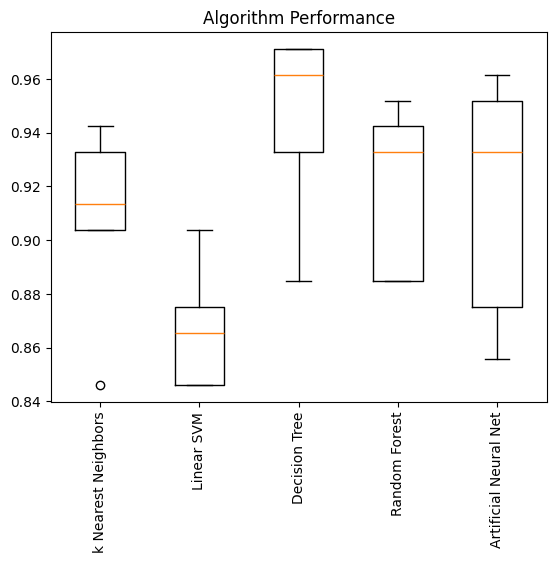

In [64]:
fig, ax2 = plt.subplots()
ax2.set_title('Algorithm Performance')
ax2.boxplot(model_comparison)
ax2.set_xticklabels(names, rotation='vertical') #then we visualise as a boxplot, adding the names of our architecture for the x-ticks

From our comparison, we can see that decision trees do very well on this data. This is likely because the data is very categorical in nature, so it is 'easier' to learn rules for separation of the data. Otherwise, our linear SVM performs very poorly, while our non-linear architectures (neighbourhood-based kNN and the new representation learning ANN) likely are able to leverage similarity knowledge in the data to achieve fairly comparable performance.

This gives us a good indication we should actually focus on rules-based architectures for this particular dataset and problem.

And there we go. A fairly holistic exploration of a digital health data set using advanced data science techniques (namely, machine learning methods). While this has been on tabular data, it is revealing for the process we will take when moving to more complex data types such as text, images and time series.

---


##Task 2 - Practical Exercises

<br>

Now that you have had an opportunity to see some machine learning at work, the time has come to try it out yourself!

<br>

###Task 2.1 - Implement GridSearch on a Tabular Dataset
Start off by trying out the following experiment:

**Dataset**: Breast Cancer Wisconsin Dataset (available here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

**Experiment**: Perform a Gridsearch to find the best combination of parameters for a Random Forest architecture on this dataset. Then use a suitable method to visualise your results.

**Extra Task**: Capture a metric other than accuracy to demonstrate your performance and visualise it on the same graph. What do you notice?

<br>

###Task 2.2 - Compare Multiple Classifiers

**Dataset**: Breast Cancer Wisconsin Dataset (available here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

**Experiment**: Add the SVM, kNN and MLP for comparison to your Random Forest algorithm.

**Extra Task**: Try to explain the outcome that you see. Which algorithm performs the best. Why do you believe this to be the case? Use features from either the dataset or each algorithm to justify your points.

Complete these tasks below:

In [65]:
uploaded = files.upload()

Saving wdbc.data to wdbc.data


In [69]:
bcw_file = io.BytesIO(uploaded['wdbc.data']) #the file is uploaded as a value in a dictionary, with the filename as the key
bcw_df = pd.read_csv(bcw_file, header=None) #after getting the file to a format we can work with, we use pandas to read the data as a dataframe
print(bcw_df) #calling print allows us to view the dataframe

           0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28 

# Task
Perform a Gridsearch to find the best combination of parameters for a Random Forest architecture on the `bcw_df` dataset. Then use a suitable method to visualise your results.

## Prepare the data

### Subtask:
Separate the features (columns 2 to 31) and the target variable (column 1) from the `bcw_df` DataFrame. Convert the target variable to a numerical format.


**Reasoning**:
Extract the features and target variable from the dataframe and convert the target to numerical values.



In [70]:
bcw_features = bcw_df.iloc[:, 2:32]
bcw_target = bcw_df.iloc[:, 1]

bcw_target = bcw_target.replace(['M', 'B'], [1, 0])

x_bcw = bcw_features.to_numpy()
y_bcw = bcw_target.values

/tmp/ipython-input-3403785899.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bcw_target = bcw_target.replace(['M', 'B'], [1, 0])


## Define the parameter grid

### Subtask:
Create a dictionary of hyperparameters and their values to search over for the `RandomForestClassifier`.


**Reasoning**:
Define the parameter grid for the GridSearchCV.



In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Perform gridsearch

### Subtask:
Instantiate a `GridSearchCV` object with the `RandomForestClassifier` and the parameter grid, and fit it to the data.


**Reasoning**:
Instantiate and fit the GridSearchCV object with the RandomForestClassifier and the defined parameter grid.



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(x_bcw, y_bcw)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

## Visualize the results

### Subtask:
Extract the mean test scores for each parameter combination from the GridSearch results and visualize them to understand the impact of different parameters on performance.


**Reasoning**:
Extract the mean test scores and parameter combinations from the GridSearch results and organize them for visualization.



In [73]:
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_scores

print(results_df.head())

   max_depth  min_samples_leaf  min_samples_split  n_estimators  \
0        NaN                 1                  2            50   
1        NaN                 1                  2           100   
2        NaN                 1                  2           200   
3        NaN                 1                  5            50   
4        NaN                 1                  5           100   

   mean_test_score  
0         0.957848  
1         0.959587  
2         0.964881  
3         0.963111  
4         0.959603  


**Reasoning**:
Visualize the mean test scores as a heatmap to show the relationship between parameter combinations and performance.



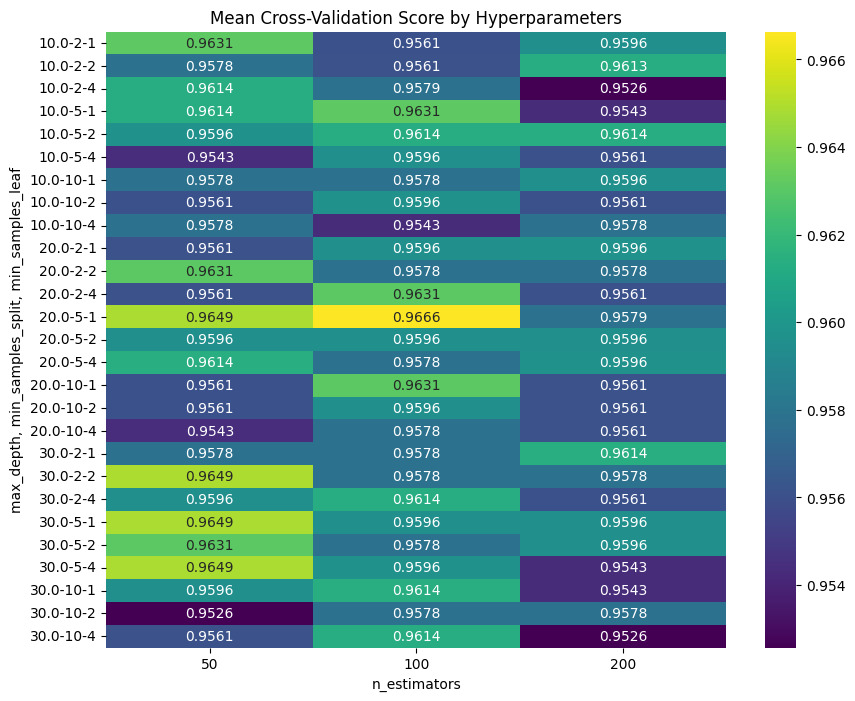

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = results_df.pivot_table(index=['max_depth', 'min_samples_split', 'min_samples_leaf'], columns='n_estimators', values='mean_test_score')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis")
plt.title('Mean Cross-Validation Score by Hyperparameters')
plt.xlabel('n_estimators')
plt.ylabel('max_depth, min_samples_split, min_samples_leaf')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully performed a grid search across various combinations of `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf` for a `RandomForestClassifier` on the `bcw_df` dataset.
*   The mean cross-validation scores were extracted and visualized using a heatmap, illustrating the performance of the model for each parameter combination.

### Insights or Next Steps

*   Examine the heatmap to identify the parameter combinations that resulted in the highest mean cross-validation scores, indicating the best performance.
*   Train the `RandomForestClassifier` with the best-performing parameters found during the grid search.
